# PROJET 5: Segmentation des Clients d'un site E-Commerce

## LE CONTEXTE 

olist souhaite obtenir une segmentation de ses clients utilisable au quotidien par leur équipe marketing dans leurs campagnes de communication. L'objectif est de comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles anonymisées.

Nous utilisererons donc des méthodes analytiques et non supervisées pour regrouper ensemble des clients de profils similaires.

### Importation  des modules & des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt

In [2]:
#Les clients
customers_df=pd.read_csv("customers.csv")
#Les données de géolocalisation
geolocation_df=pd.read_csv("geolocation.csv")
#Les articles
orders_items_df=pd.read_csv("order_items.csv")
#Les reglements
orders_payment_df=pd.read_csv("order_payments.csv")
#Avis clients
orders_review_df=pd.read_csv("order_reviews.csv")
#Les commandes clients
orders_df=pd.read_csv("orders.csv")
#Categories traduites
products_df=pd.read_csv("products.csv")
#Les produits
category_trans_df=pd.read_csv("product_category.csv")
#Les vendeurs
sellers_df=pd.read_csv("sellers.csv")

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
geolocation_df.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [6]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [7]:
orders_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [8]:
orders_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
orders_payment_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [10]:
orders_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
orders_review_df.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [12]:
orders_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [13]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
products_df.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [16]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [17]:
category_trans_df.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [18]:
category_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
sellers_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [20]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


## Prétraitement des données

nous allons supprimer les variables qui ne sont pas utiles pour notre mission. 

In [21]:
orders_review_df.drop(columns = ['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], inplace=True, axis=1)

In [22]:
products_df.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True, axis=1)

Detection des Valeurs manquantes et doublons

In [23]:
datasets = [customers_df, geolocation_df, orders_items_df, orders_payment_df, orders_review_df, orders_df, products_df, sellers_df, category_trans_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['Nom_columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['Nombr_ligne']= [data.shape[0] for data in datasets]
data_summary['Nombrl_cols']= [data.shape[1] for data in datasets]
data_summary['Nombr_duplic']= [data.duplicated().sum() for data in datasets]
data_summary['Nombr_manquent']= [data.isnull().sum().sum() for data in datasets]

data_summary.style.background_gradient(cmap='Blues')

,datasets,Nom_columns,Nombr_ligne,Nombrl_cols,Nombr_duplic,Nombr_manquent
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0
4,reviews,"review_id, order_id, review_score",99224,3,0,0
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908
6,products,"product_id, product_category_name, product_weight_g",32951,3,0,612
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0


#### comme Il y a des doublons dans geolocation_df, je vais donc procéder à leur suppression

In [24]:
geolocation_df.drop_duplicates(inplace = True)

#### traitement des valeurs manquantes 

Affichage des collones qui contient des manquantes

In [25]:
orders_review_df.isnull().sum()

review_id       0
order_id        0
review_score    0
dtype: int64

In [26]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [27]:
products_df.isnull().sum()

product_id                 0
product_category_name    610
product_weight_g           2
dtype: int64

In [28]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [29]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [30]:
orders_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [31]:
orders_payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [32]:
category_trans_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [33]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Traitement des valeurs manquants

In [34]:
#supprimer les colonnes dates qui contient des manquants
orders_df.drop(columns = ['order_delivered_carrier_date', 'order_delivered_customer_date', "order_approved_at"], inplace=True, axis=1)

#imputation par moyenne colonnes quantitative
mean = products_df["product_weight_g"].mean()
products_df["product_weight_g"].fillna(mean, inplace=True)

#imputation les colonnes categorielle
products_df['product_category_name'].fillna(value = 'PasCategorie', inplace = True)

In [35]:
datasets = [customers_df, geolocation_df, orders_items_df, orders_payment_df, orders_review_df, orders_df, products_df, sellers_df, category_trans_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['Nom_columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['Nombr_ligne']= [data.shape[0] for data in datasets]
data_summary['Nombrl_cols']= [data.shape[1] for data in datasets]
data_summary['Nombr_duplic']= [data.duplicated().sum() for data in datasets]
data_summary['Nombr_manquent']= [data.isnull().sum().sum() for data in datasets]

data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,Nom_columns,Nombr_ligne,Nombrl_cols,Nombr_duplic,Nombr_manquent
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0
4,reviews,"review_id, order_id, review_score",99224,3,0,0
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_estimated_delivery_date",99441,5,0,0
6,products,"product_id, product_category_name, product_weight_g",32951,3,0,0
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0


### Fusionner des dataframes

Après avoir nettoyé les données et supprimé les colonnes inutiles, nous allons créer une fusion qui respecte le modèle de données fourni par Olist.

In [36]:
merged_df= pd.merge(customers_df, orders_df, on="customer_id", how="left")
merged_df= merged_df.merge(orders_review_df, on="order_id", how="left")
merged_df= merged_df.merge(orders_items_df, on="order_id", how="left")
merged_df= merged_df.merge(products_df, on="product_id", how="left")
merged_df= merged_df.merge(orders_payment_df, on="order_id", how="left")
merged_df= merged_df.merge(sellers_df, on='seller_id', how="left")
merged_df= merged_df.merge(category_trans_df, on='product_category_name', how="left")

In [37]:
merged_df.shape

(119143, 27)

<Axes: >

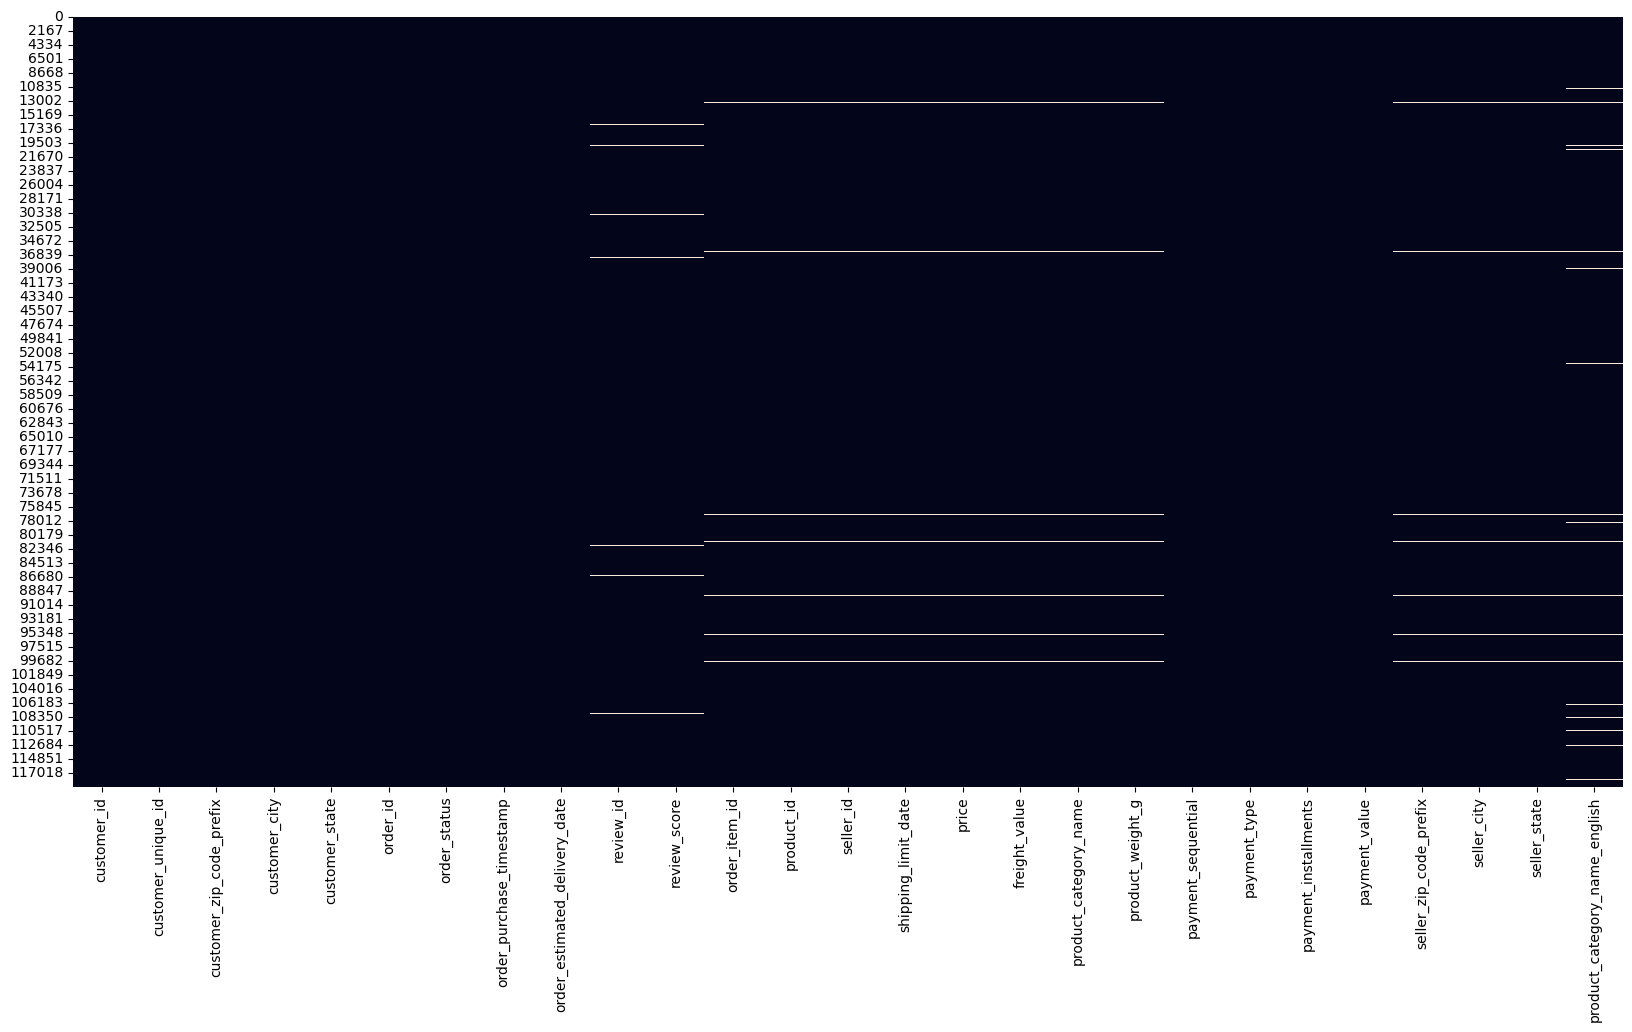

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(merged_df.isnull(), cbar=False)

## Feature engineering 

In [39]:
# Imputer les valeurs manquantes par les valeurs les plus proches
merged_df = merged_df.interpolate()

In [40]:
#imputation des colonnes catégorielles
merged_df['seller_state'].fillna(value = 'Passtat', inplace=True)
merged_df['seller_city'].fillna(value = 'PasVille', inplace=True)
merged_df['product_category_name'].fillna(value = 'PasCategorie', inplace = True)

In [41]:
#les colonnes qui ne sont pas utile
merged_df.drop(["customer_zip_code_prefix",
                "customer_city",
                "customer_state",
                "seller_id",
                "payment_type",
                "product_id",
                "product_category_name_english",
                "shipping_limit_date",
                "review_id"], axis=1, inplace=True)

In [42]:
merged_df.isnull().sum()

customer_id                      0
customer_unique_id               0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
review_score                     0
order_item_id                    0
price                            0
freight_value                    0
product_category_name            0
product_weight_g                 0
payment_sequential               0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

<Axes: >

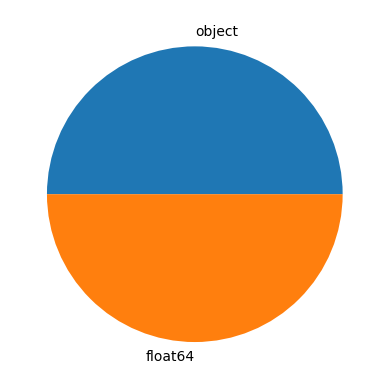

In [43]:
merged_df.dtypes.value_counts().plot.pie()

Après avoir identifié les "features" pertinents, nous allons afficher une matrice de corrélation pour déterminer s'il y a une corrélation entre ces variables sélectionnées.

/var/folders/60/hb75r86s6q32cwlq2m29fbkm0000gn/T/ipykernel_756/1463994591.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


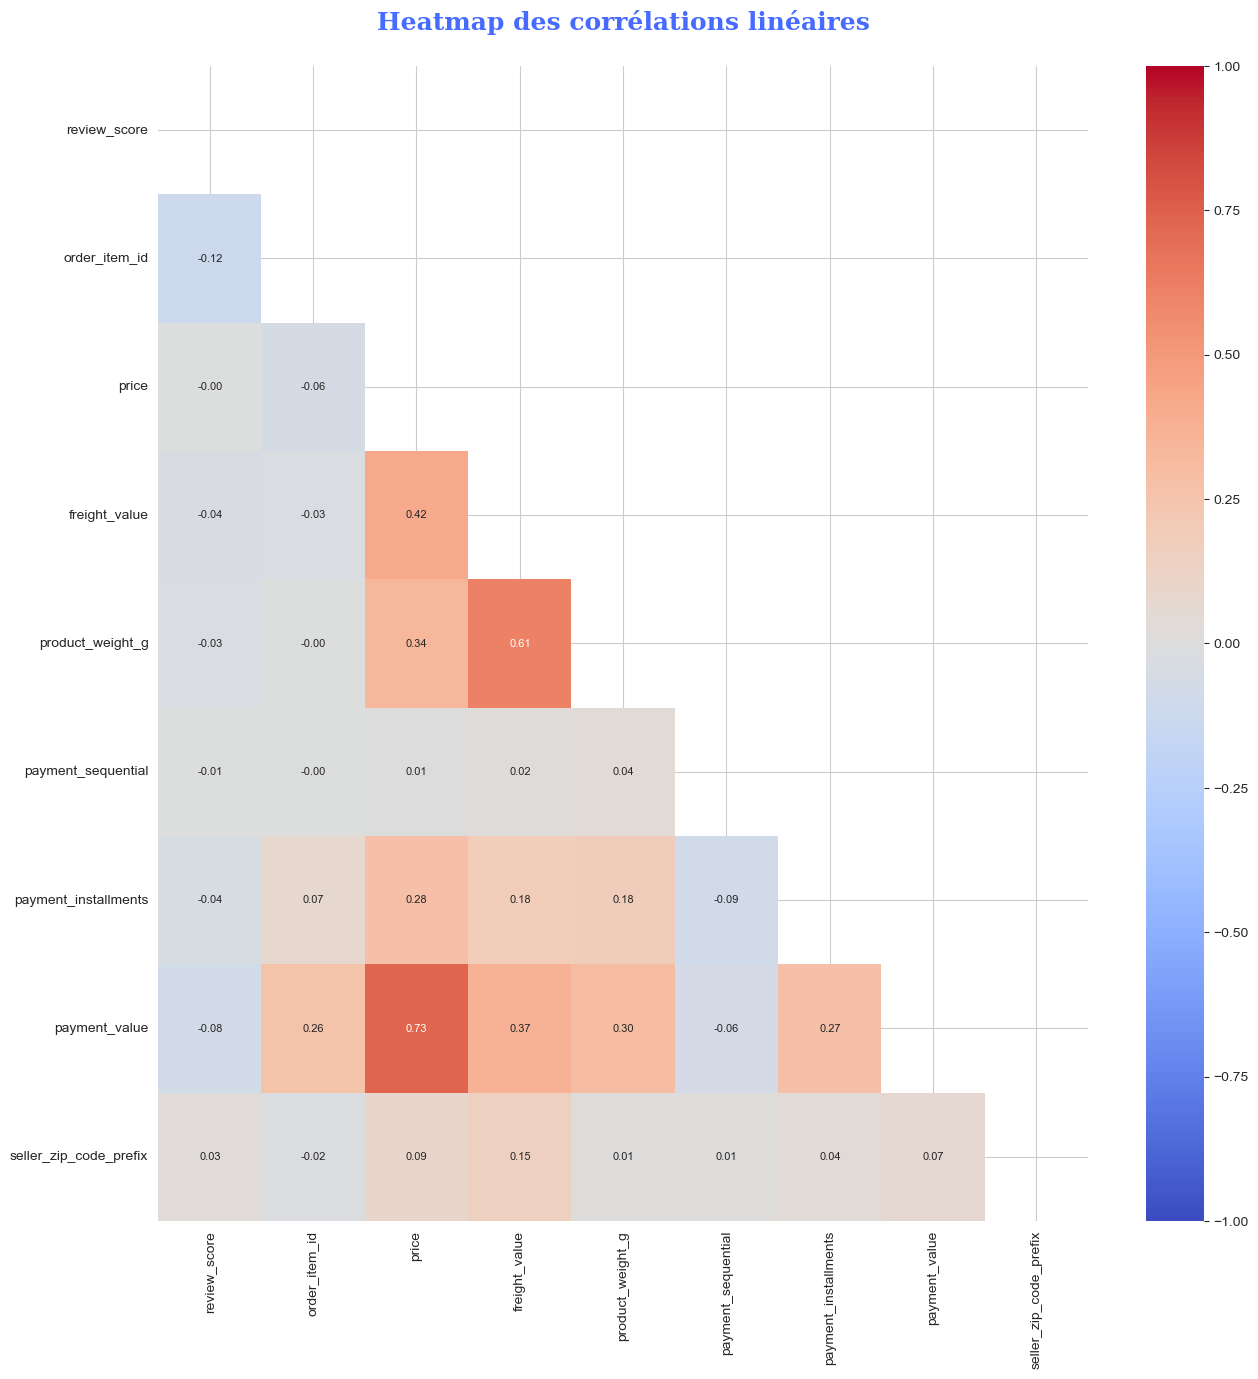

In [44]:
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

corr = merged_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, 
                 center=0, 
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

## La distribution des variables

Après avoir effectué le nettoyage et la fusion des données, nous procéderons à l'analyse des variables.

#### La valeur du paiement au fil du temps

In [45]:
# Les colonnes de date doivent avoir un type datetime donc je vais les convertir.
time_columns = ['order_purchase_timestamp', 'order_estimated_delivery_date']

merged_df[time_columns] = merged_df[time_columns].apply(pd.to_datetime)

/var/folders/60/hb75r86s6q32cwlq2m29fbkm0000gn/T/ipykernel_756/1124494687.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = merged_df['order_purchase_timestamp'], y = merged_df['payment_value'], palette = 'viridis')


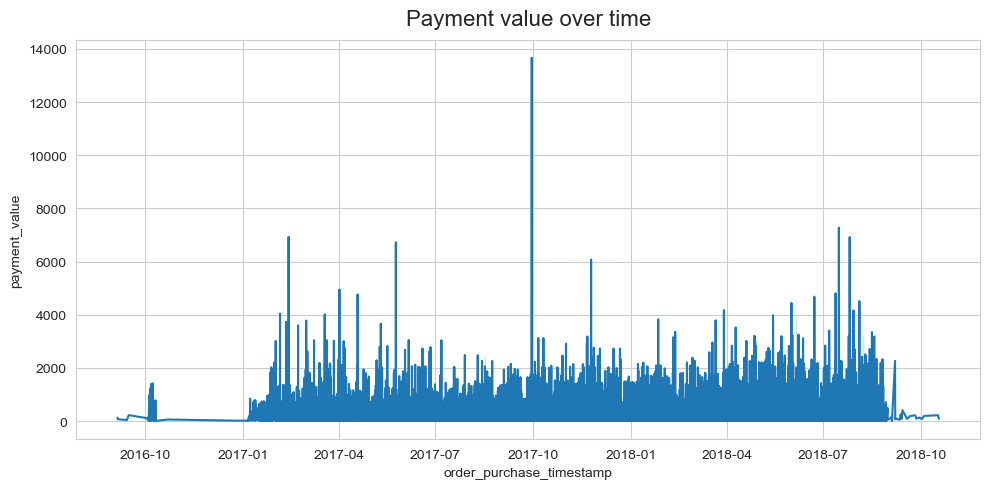

In [46]:
#Création d'un graphique pour afficher la valeur du paiement au fil du temps
plt.figure(figsize = (10, 5))
sns.lineplot(x = merged_df['order_purchase_timestamp'], y = merged_df['payment_value'], palette = 'viridis')
plt.title('Payment value over time', fontdict = {'fontsize': 16}, pad = 10.5)

plt.tight_layout()

Analyse de graphique : D'après le graphe, nous constatons qu'il y a des pics remarquables qui reflètent les volumes de commandes. Cela est normal car c'est la période des fêtes à la fin de l'année.

#### les meilleurs catégories en fonction du paiement

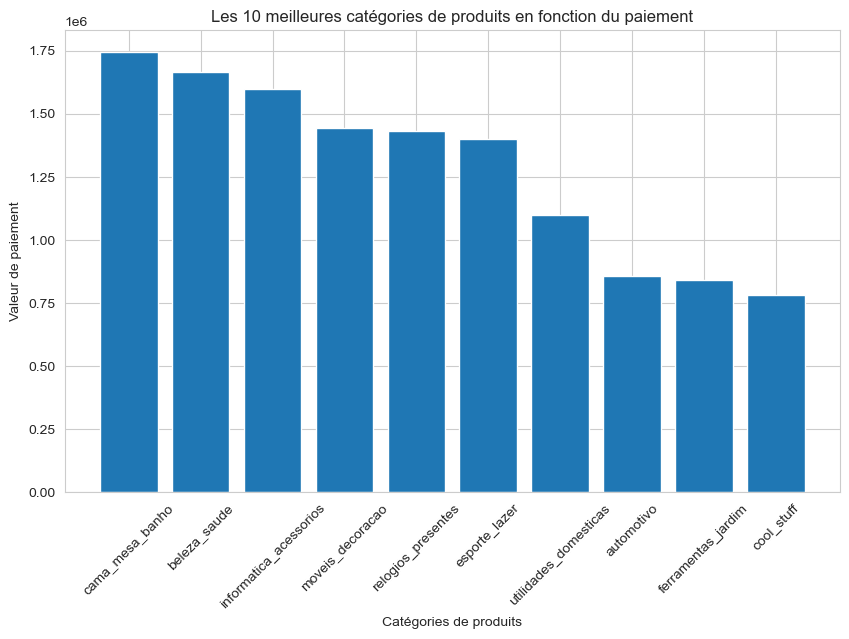

In [47]:
# Trie les données par "payment_value"
merged_df = merged_df.sort_values(by=["payment_value"], ascending=False)

# les 10 meilleures catégories de produits en fonction du paiement
top_categories = merged_df.groupby("product_category_name")["payment_value"].sum().sort_values(ascending=False).head(10)

# le graphe
plt.figure(figsize=(10,6))
plt.bar(top_categories.index, top_categories.values)
plt.xticks(rotation=45)
plt.xlabel("Catégories de produits")
plt.ylabel("Valeur de paiement")
plt.title("Les 10 meilleures catégories de produits en fonction du paiement")
plt.show()

#### Variables Qualitatives 

<Figure size 640x480 with 0 Axes>

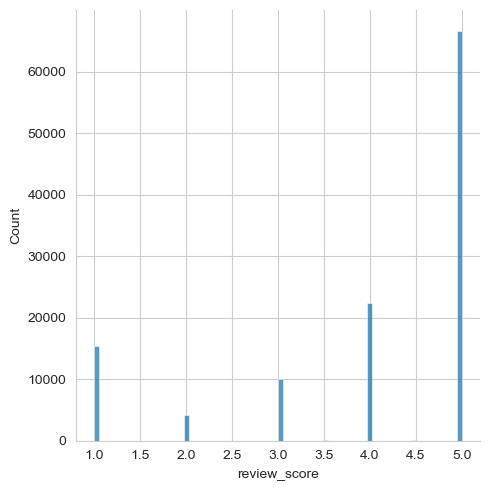

<Figure size 640x480 with 0 Axes>

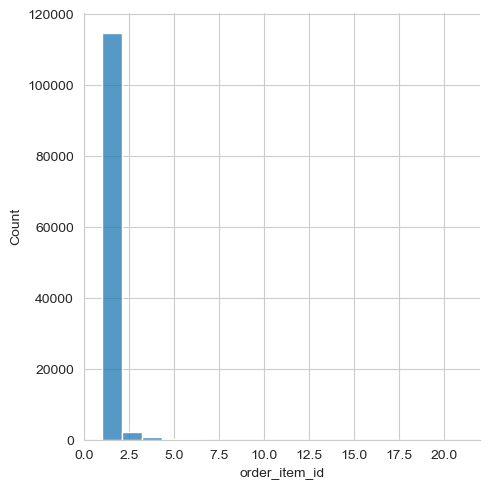

<Figure size 640x480 with 0 Axes>

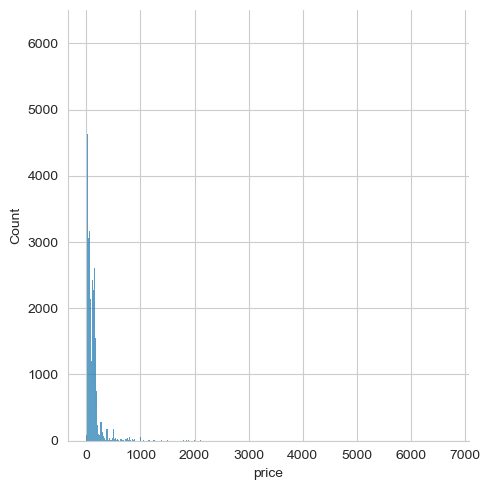

<Figure size 640x480 with 0 Axes>

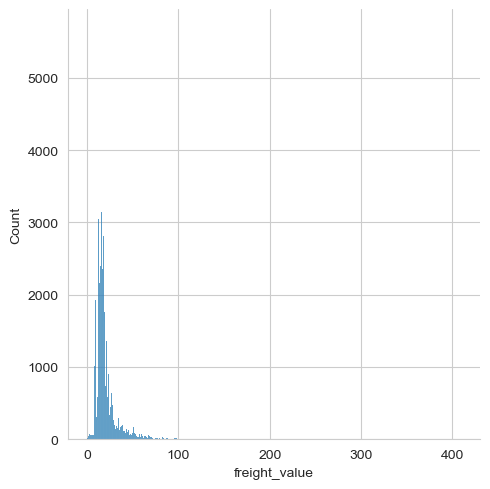

<Figure size 640x480 with 0 Axes>

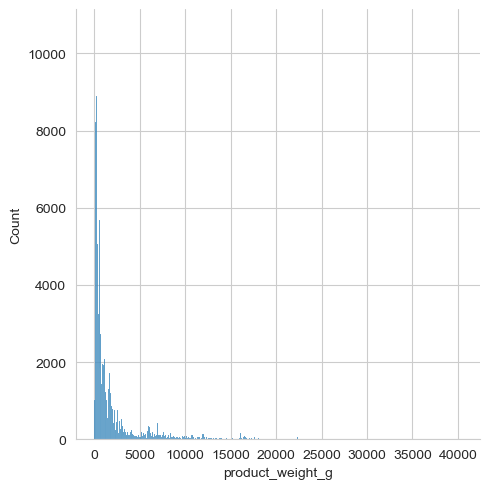

<Figure size 640x480 with 0 Axes>

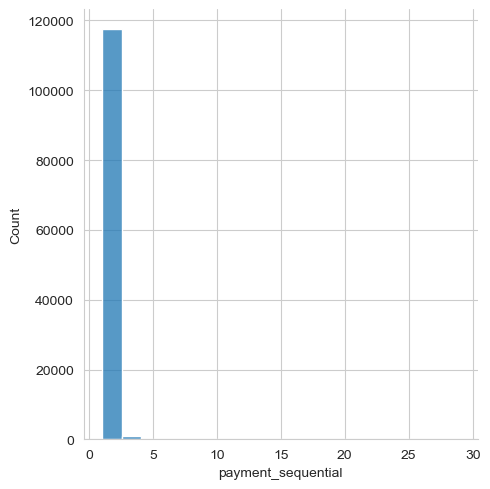

<Figure size 640x480 with 0 Axes>

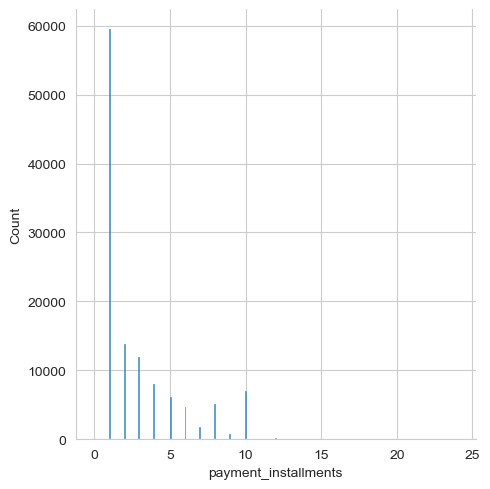

<Figure size 640x480 with 0 Axes>

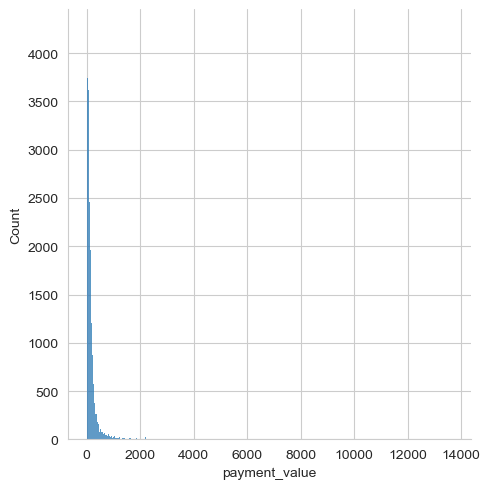

<Figure size 640x480 with 0 Axes>

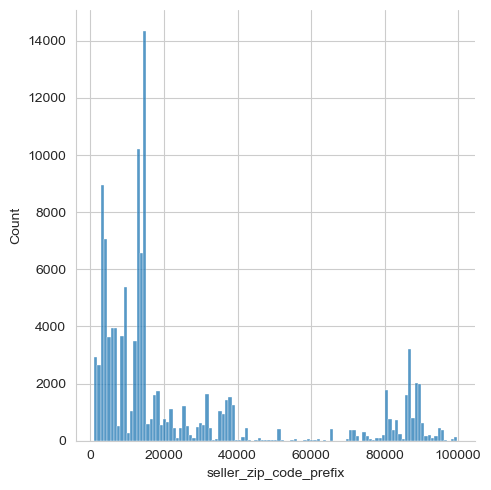

In [48]:
#d'autre Variables Quantitatives
for col in merged_df.select_dtypes(float):
    plt.figure()
    sns.displot(merged_df[col])

## ANALYSE RFM

*Récence* : la récence fait référence au temps qui s'est écoulé depuis le dernier achat d'un client. Il s'agit d'un facteur pertinent car les clients qui ont récemment interagi avec une marque sont plus susceptibles de réagir à une nouvelle initiative marketing, ce qui rend leur identification extrêmement précieuse.

*Fréquence* : Il s'agit du nombre de fois qu'un client a effectué un achat. Les consommateurs qui ont acheté plus d'une fois sont plus susceptibles d'acheter à nouveau.

*Monétaire* : ce facteur fait référence à la somme d'argent dépensée par le client sur une période donnée. Les clients qui dépensent beaucoup d'argent sont plus susceptibles de dépenser de l'argent à l'avenir et ont une grande valeur pour une entreprise.

Pour effectuer ce type d'analyse, il faut commencer par définir ces trois paramètres.

#### Récence

In [49]:
date_actuell = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days = 1)

#Show "current" date
print(f"date actuell: {date_actuell}")

date actuell: 2018-10-18 17:30:18


In [50]:
#la date du dernier achat dans une nouvelle dataframe
recence_df = merged_df.groupby(['customer_unique_id'], as_index = False)['order_purchase_timestamp'].max()

In [51]:
#la valeur de récence pour chaque client ajoutant une nouvelle colonne
recence_df['recence'] = recence_df['order_purchase_timestamp'].apply(lambda x: (date_actuell - x).days)
recence_df.head()

,customer_unique_id,order_purchase_timestamp,recence
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,161
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,164
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,337


#### Fréquence

In [52]:
#Obtain the number of unique orders by customer in a new dataframe
frequence_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))

#Rename column to 'frequency'
frequence_df.rename(columns={"order_id":"frequence"}, inplace=True)

#Show results
frequence_df.head()

,customer_unique_id,frequence
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


#### Monétaire

In [53]:
#Calculate payment value group by customer id in a new dataframe
mont_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

#Rename 'payment value' column to 'monetary'
mont_df.rename(columns={"payment_value":"monetary"}, inplace=True)

#Show results
mont_df.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


#### Merge dataframes

In [54]:
rfm_df = recence_df.merge(frequence_df, on='customer_unique_id', how="left")
rfm_df = rfm_df.merge(mont_df, on='customer_unique_id', how="left")

#Setting column 0 as the index
rfm_df.set_index(rfm_df.columns[0], inplace=True)

# Supprimer la colonne "order_purchase_timestamp"
rfm_df.drop('order_purchase_timestamp', axis=1, inplace=True)

# Afficher les résultats
rfm_df.head()

,recence,frequence,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
0000f46a3911fa3c0805444483337064,586,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
0004aac84e0df4da2b147fca70cf8255,337,1,196.89


## distrubtion des variables

Avant de commencer la segmentation basée sur la méthode RFM, je vais d'abord examiner la distribution de ses trois paramètres.

In [55]:
def empirical_distribution(dataframe, feature):

    # filtering non-null data
    mask = dataframe[feature].notnull()
    data_view = dataframe[mask]
    
    # Setting the data to plot
    x = data_view[feature]
    
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize=(20, 10))
    plt.suptitle("Statistical distribution: " + feature, fontsize=25)
    ax1 = fig.add_subplot(211) # histogram
    ax2 = fig.add_subplot(212) # boxplot

    # Tell distplot to plot on ax1 with the ax argument
    sns.distplot(x, ax=ax1)
    ax1.set_ylabel("Frequency", fontsize=20)
    ax1.set_xlabel("")

    # Tell the boxplot to plot on ax2 with the ax argument
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
    sns.boxplot(x,
                ax=ax2,
                showfliers=True,
                medianprops=medianprops,
                showmeans=True,
                meanprops=meanprops)
    ax2.set_xlabel("Value", fontsize=20)

/var/folders/60/hb75r86s6q32cwlq2m29fbkm0000gn/T/ipykernel_756/3633236846.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax1)


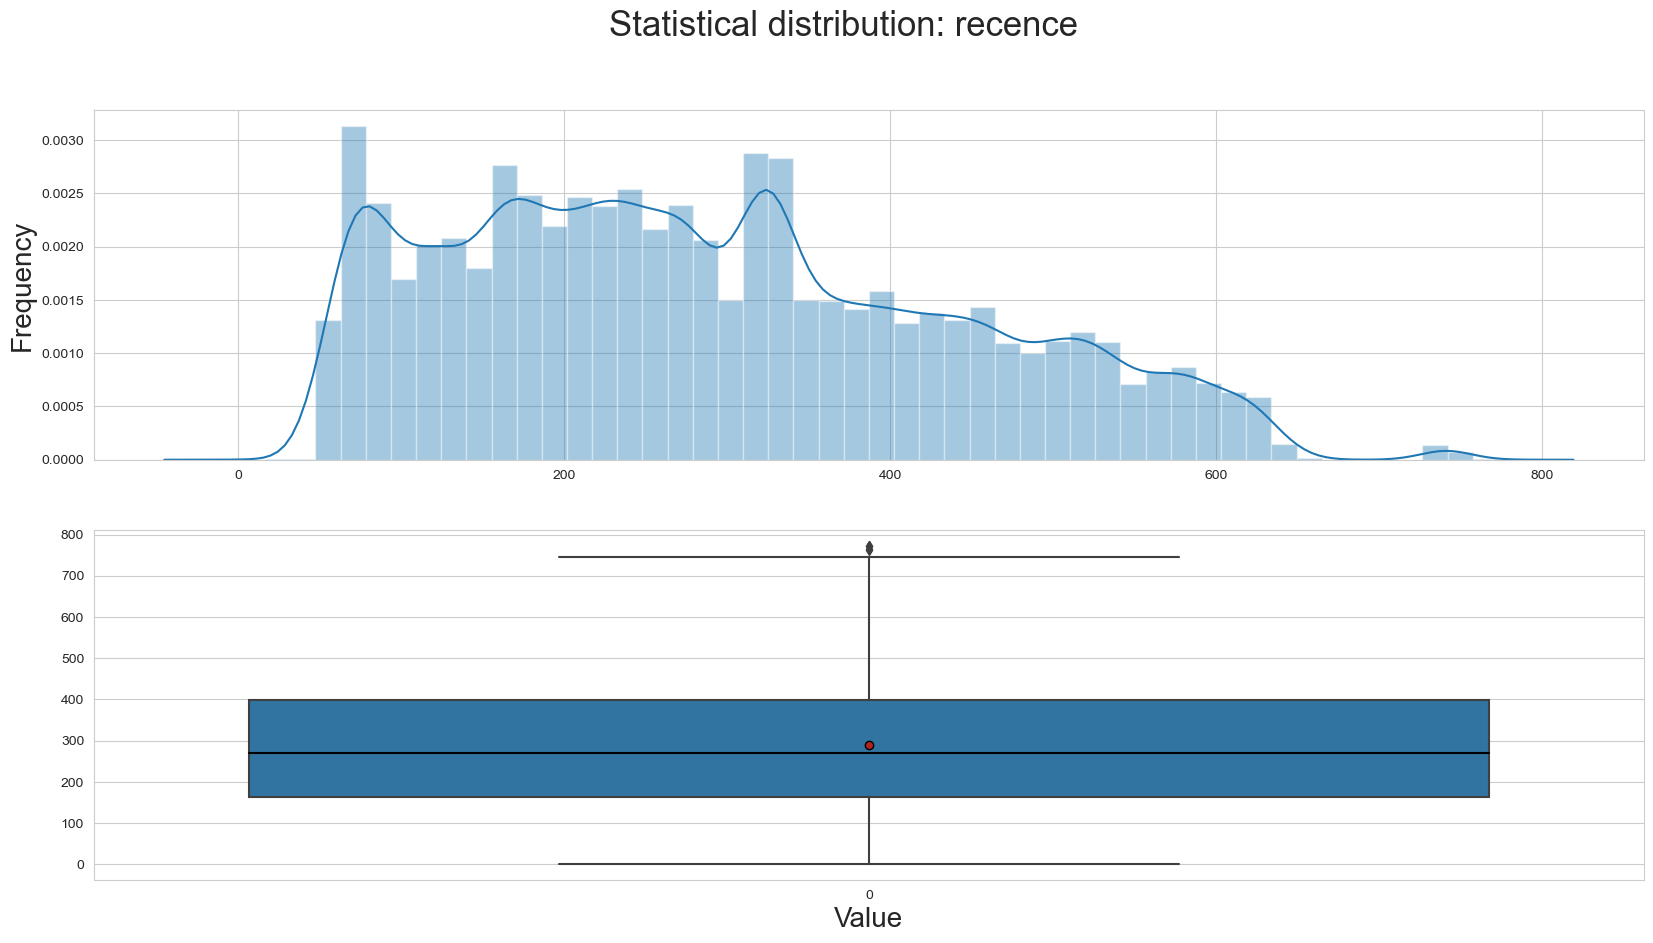

In [56]:
# Réglage des paramètres avant d'appeler la fonction
dataframe = rfm_df
feature = "recence"

# Appel à la fonction
empirical_distribution(dataframe, feature)

/var/folders/60/hb75r86s6q32cwlq2m29fbkm0000gn/T/ipykernel_756/3633236846.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax1)


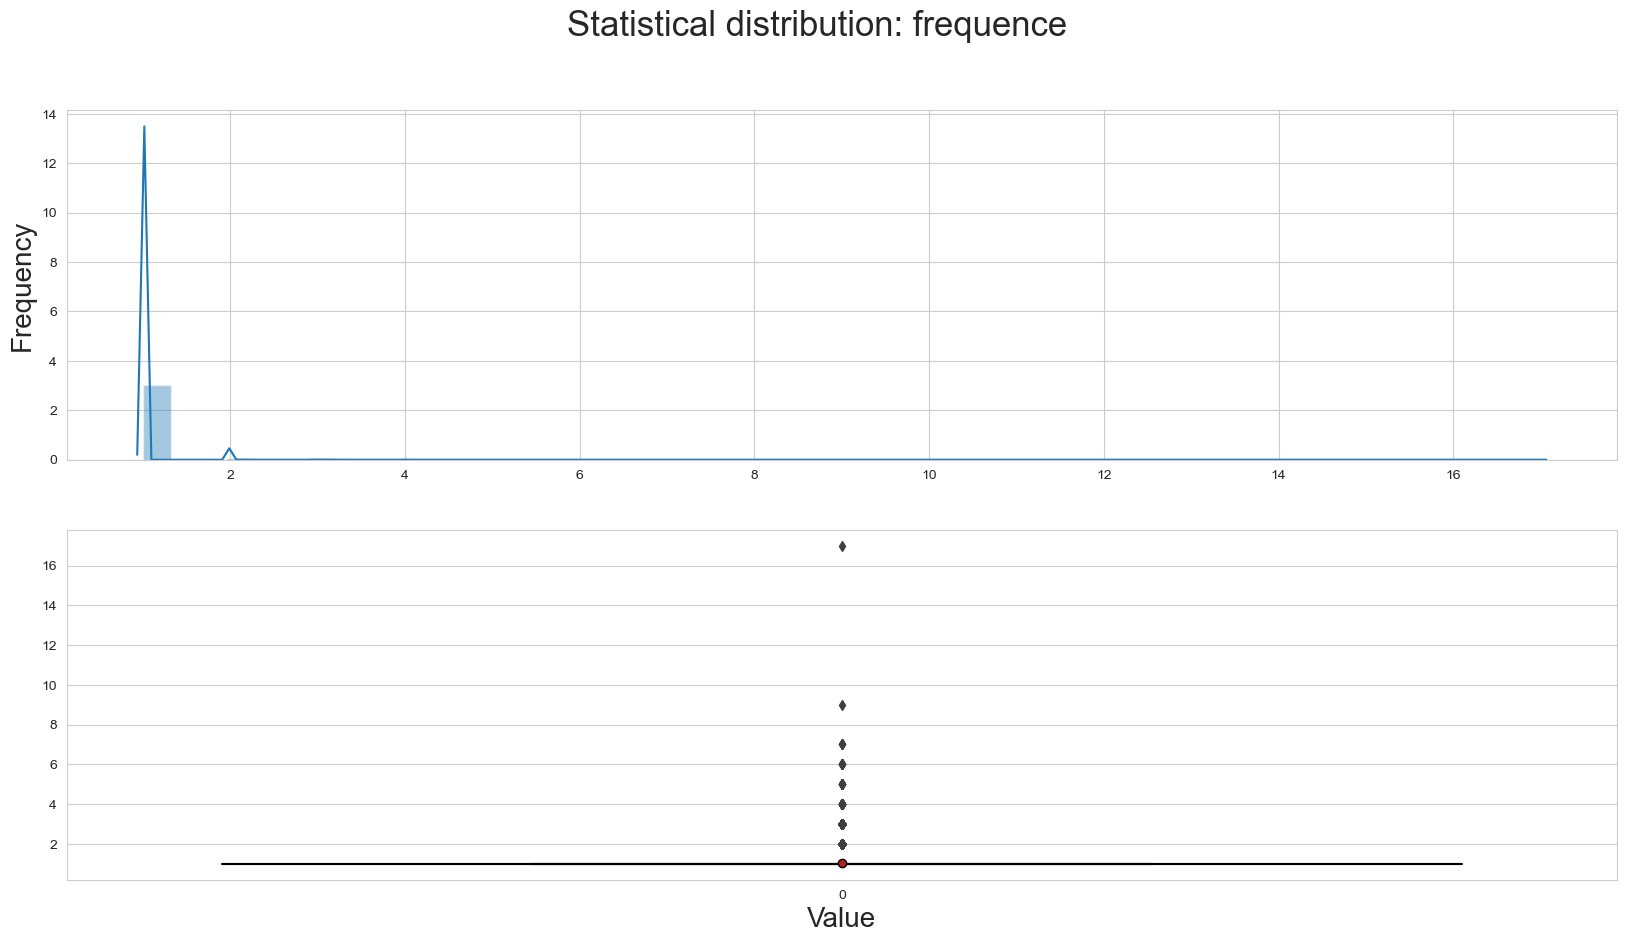

In [57]:
dataframe = rfm_df
feature = "frequence"

empirical_distribution(dataframe, feature)

/var/folders/60/hb75r86s6q32cwlq2m29fbkm0000gn/T/ipykernel_756/3633236846.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax1)


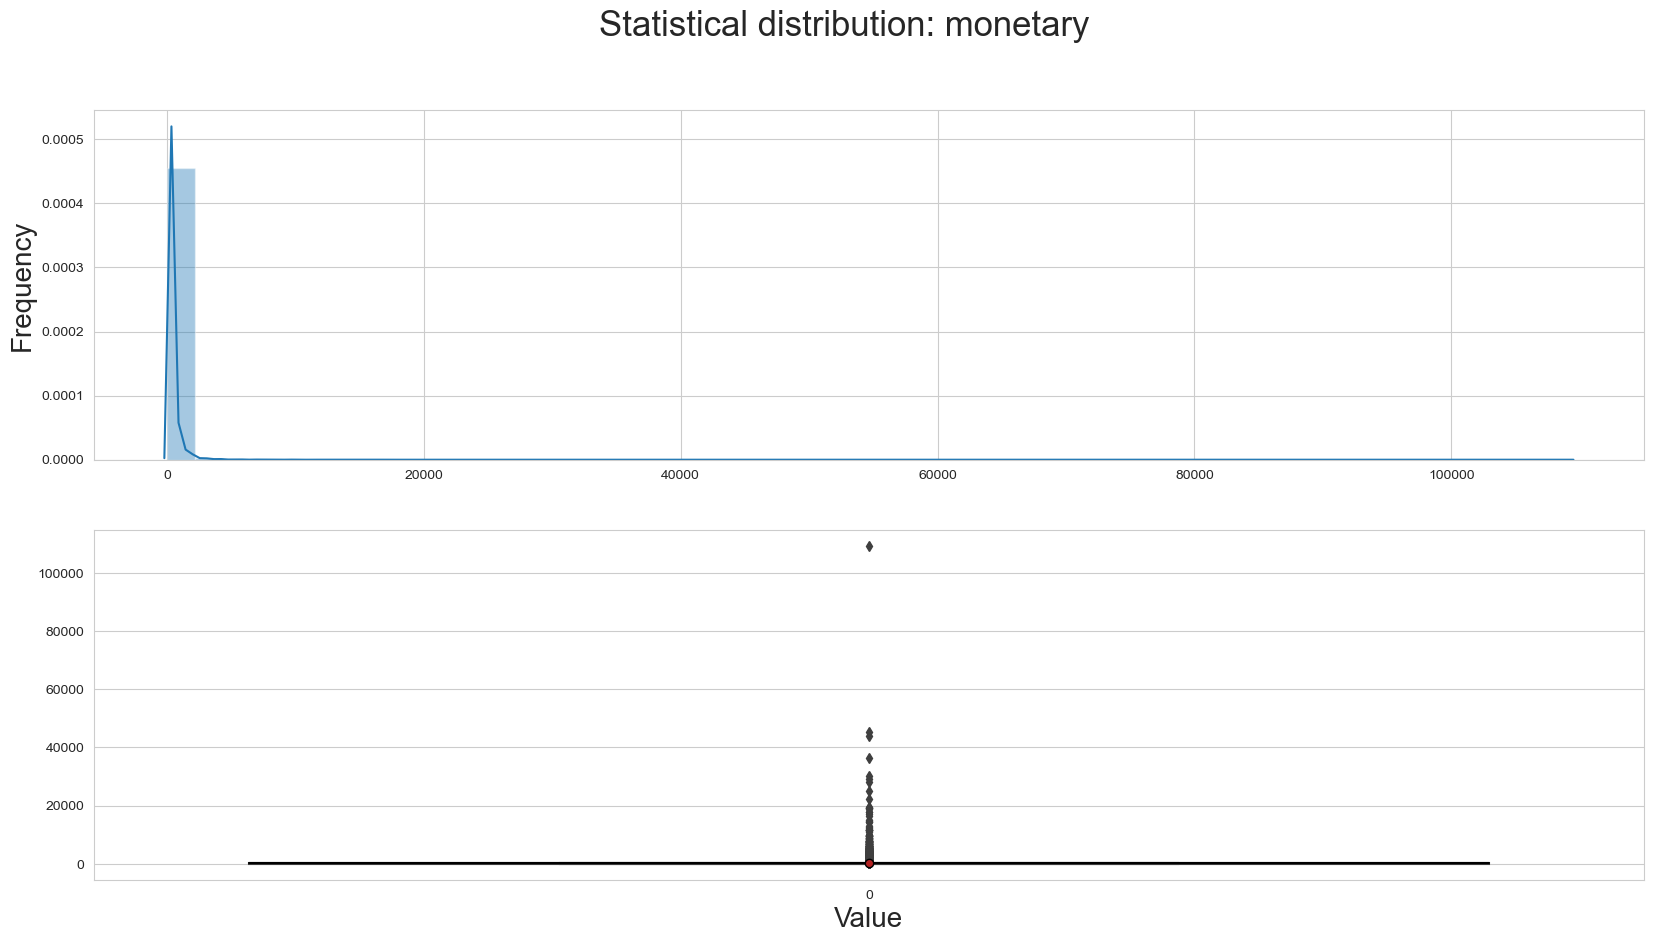

In [58]:
dataframe = rfm_df
feature = "monetary"

empirical_distribution(dataframe, feature)

## Clustering avec l'algorithme du K-Means

##### K-Means pour les features de RFM

On commence le clustering avec K-Means pour les features RFM. Ensuite, nous utilisons deux techniques, à savoir la méthode du coude et la méthode de la silhouette, pour déterminer le nombre optimal de clusters dans notre algorithme de clustering.

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [60]:
numerical_features = list(rfm_df.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['recence', 'frequence', 'monetary']

In [61]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

In [62]:
preprocessor

ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                 ['recence', 'frequence', 'monetary'])])

/Users/sbeddyy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sbeddyy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sbeddyy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sbeddyy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sbedd

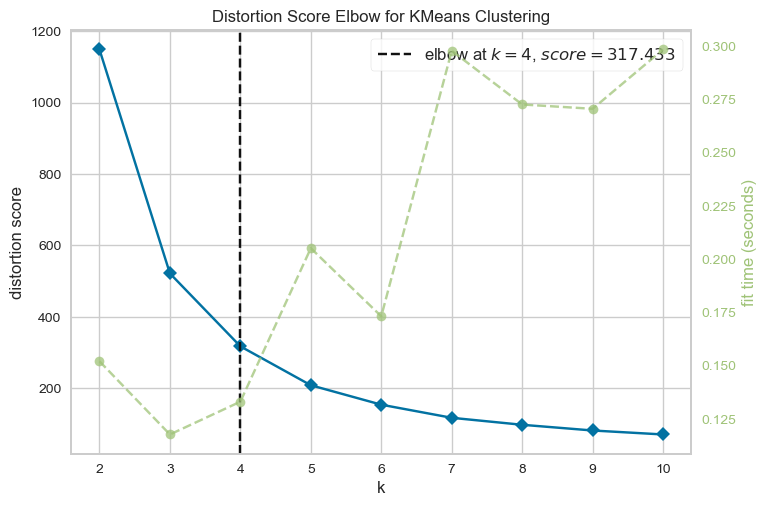

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

X = rfm_df[['recence', 'frequence', 'monetary']]

# méthode du coude
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(2,10)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Selon la méthode du coude basée sur le score de distortion, nous constatons que K=4. Cela suggère qu'une segmentation en K=4 clusters serait la meilleure option.

##### Coefficient de silhouette

Pour vérifier si ce clustering fonctionne, nous allons utiliser SilhouetteVisualizer pour afficher le coefficient de silhouette pour un échantillonage de chaque cluster

/Users/sbeddyy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


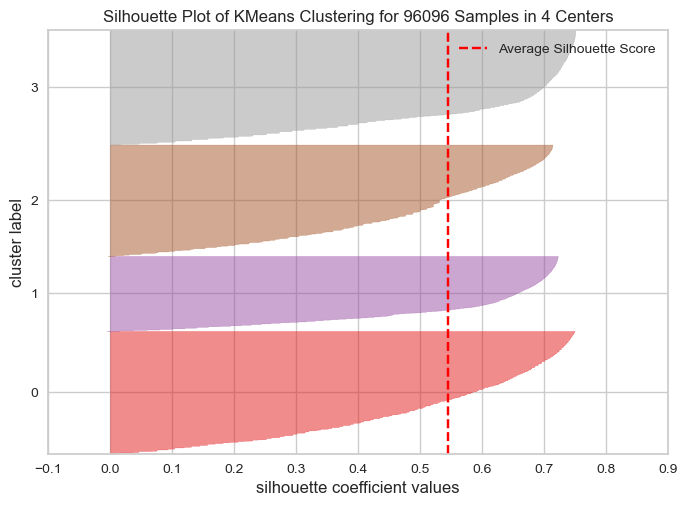

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 96096 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [64]:
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
visualizer_Silh = Pipeline([
    ("preprocessor", preprocessor),
    ("visualizer_Silh", SilhouetteVisualizer(KMeans(K)))])
visualizer_Silh.fit(X)
visualizer_Silh.named_steps['visualizer_Silh'].show()

En regardant la silhouette plot, nous constatons que les 4 clusters ont des coefficients proches de 1 (≈ 0,7). Nous pouvons donc en déduire que les clients sont bien classés dans leur cluster respectif.

### ANALYSE DE CLUSTER

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(X)

/Users/sbeddyy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
# Function to visualize clusters
def rfm_values(df):
    df_new = df.groupby(['cluster']).agg({
            'recence': 'mean',
            'frequence': 'mean',
            'monetary': ['mean', 'count']
        }).round(0)

    return df_new

In [67]:
rfm_values(rfm_df)

recence frequence  monetary       
           mean      mean      mean  count
cluster                                   
0         290.0       1.0    2270.0   1746
1         276.0       1.0   19159.0     32
2         384.0       1.0  109313.0      1
3         289.0       1.0     169.0  94317

In [77]:
# compter le nombre de clients dans chaque cluster
count = rfm_df['cluster'].value_counts()

# afficher le résultat
print(count)

3    94317
0     1746
1       32
2        1
Name: cluster, dtype: int64


Après avoir examiné ces résultats, nous pouvons tirer les conclusions suivantes :
- Le grand cluster contenant 94317 clients est de loin le plus important, car il représente la majorité des données. Cela peut suggérer que les clients de ce cluster ont des comportements similaires et qu'ils constituent une part importante de la base de données clients.

- Les clusters plus petits sont moins significatifs en raison de leur taille réduite, mais ils peuvent encore fournir des informations importantes sur les sous-groupes de clients qui ont des comportements distincts.

- Le fait qu'un cluster ne contienne qu'un seul client peut indiquer que ce client a des caractéristiques très différentes des autres clients. Par conséquent, il peut nécessiter une attention particulière dans l'analyse de marketing.

##### ANALYSE UNIVARIEE

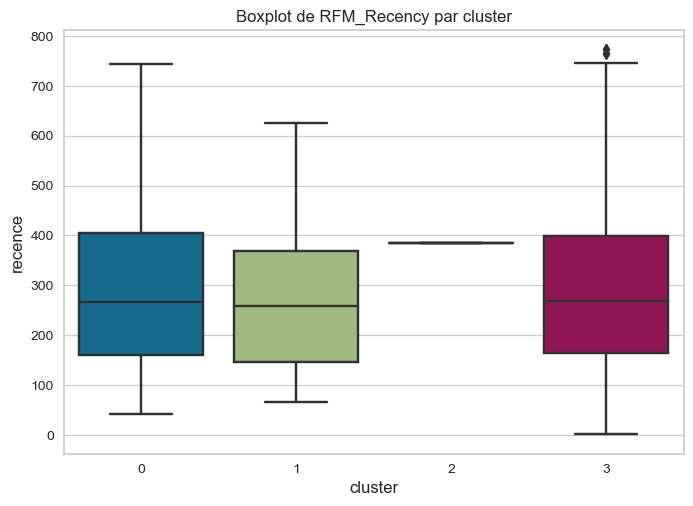

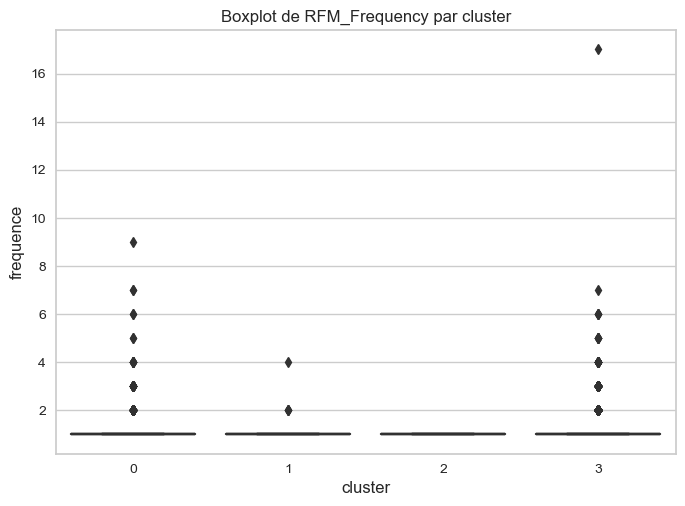

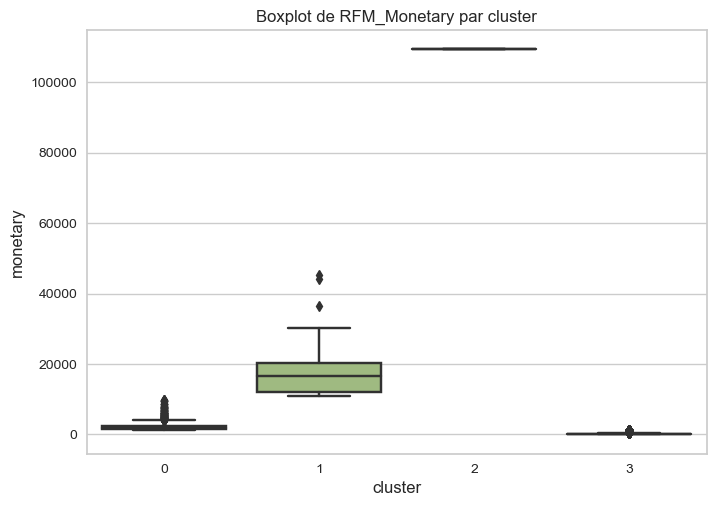

In [71]:
# Graphique de boxplot pour la feature Recency
sns.boxplot(x='cluster', y='recence', data=rfm_df)
plt.title('Boxplot de RFM_Recency par cluster')
plt.show()

# Graphique de boxplot pour la feature Frequency
sns.boxplot(x='cluster', y='frequence', data=rfm_df)
plt.title('Boxplot de RFM_Frequency par cluster')
plt.show()

# Graphique de boxplot pour la feature Monetary
sns.boxplot(x='cluster', y='monetary', data=rfm_df)
plt.title('Boxplot de RFM_Monetary par cluster')
plt.show()

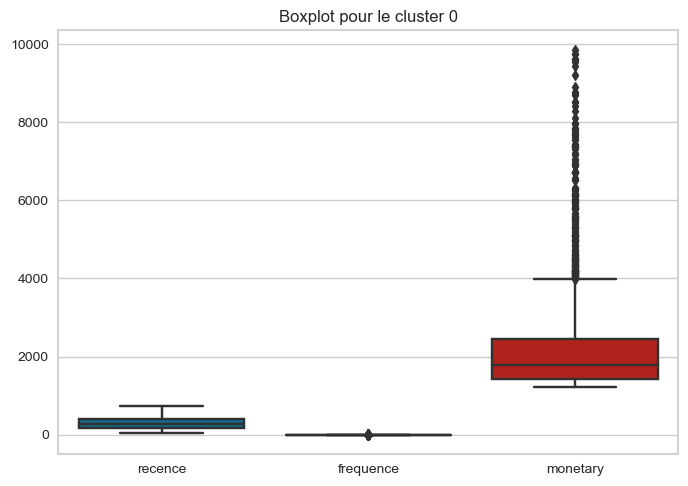

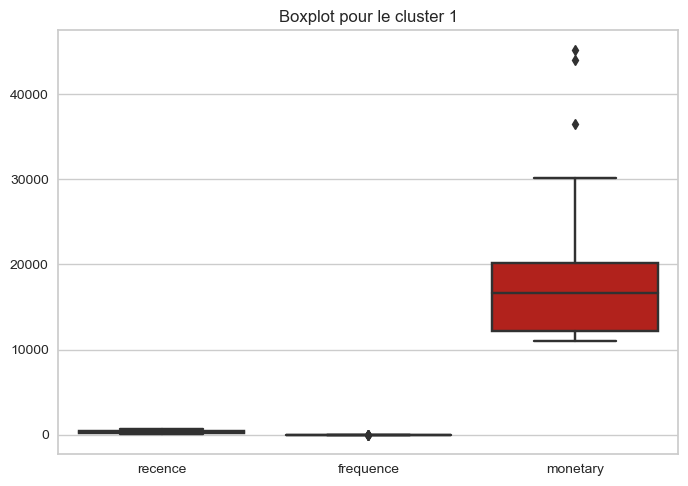

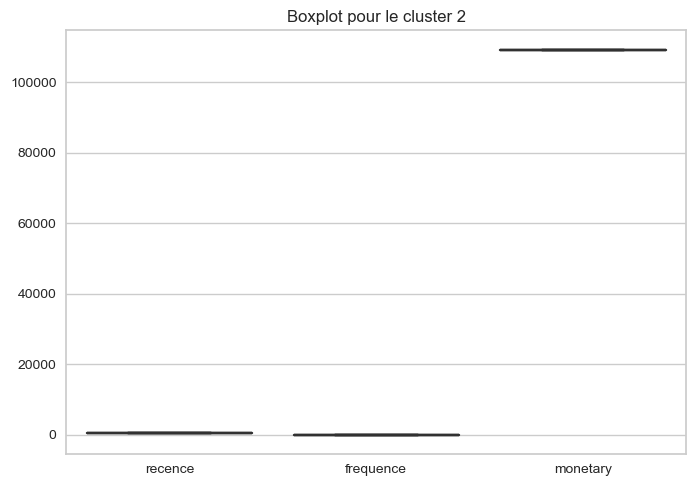

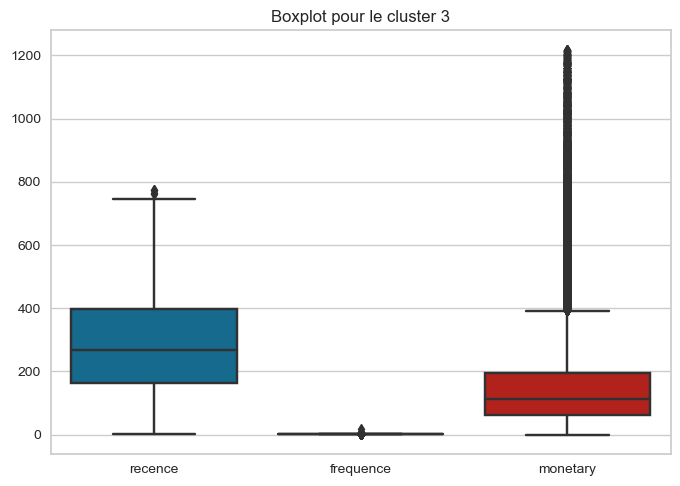

In [73]:
# Graphique de boxplot pour le cluster 0
sns.boxplot(data=rfm_df[rfm_df['cluster'] == 0][['recence', 'frequence', 'monetary']])
plt.title('Boxplot pour le cluster 0')
plt.show()

# Graphique de boxplot pour le cluster 1
sns.boxplot(data=rfm_df[rfm_df['cluster'] == 1][['recence', 'frequence', 'monetary']])
plt.title('Boxplot pour le cluster 1')
plt.show()

# Graphique de boxplot pour le cluster 2
sns.boxplot(data=rfm_df[rfm_df['cluster'] == 2][['recence', 'frequence', 'monetary']])
plt.title('Boxplot pour le cluster 2')
plt.show()

# Graphique de boxplot pour le cluster 3
sns.boxplot(data=rfm_df[rfm_df['cluster'] == 3][['recence', 'frequence', 'monetary']])
plt.title('Boxplot pour le cluster 3')
plt.show()

##### ANALYSE BIVARIEE

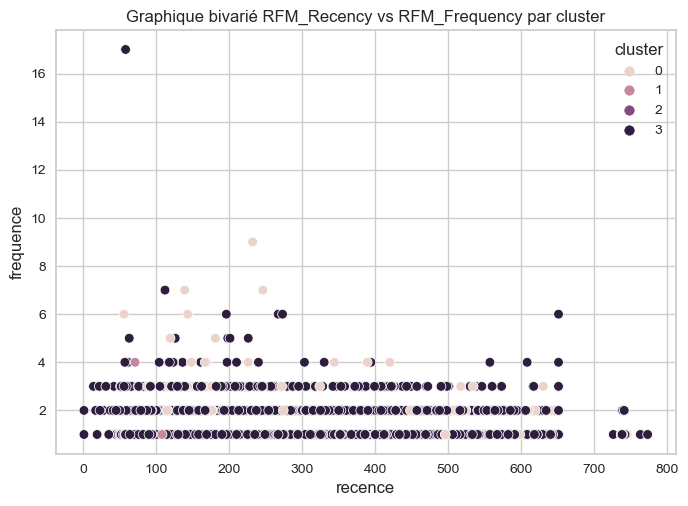

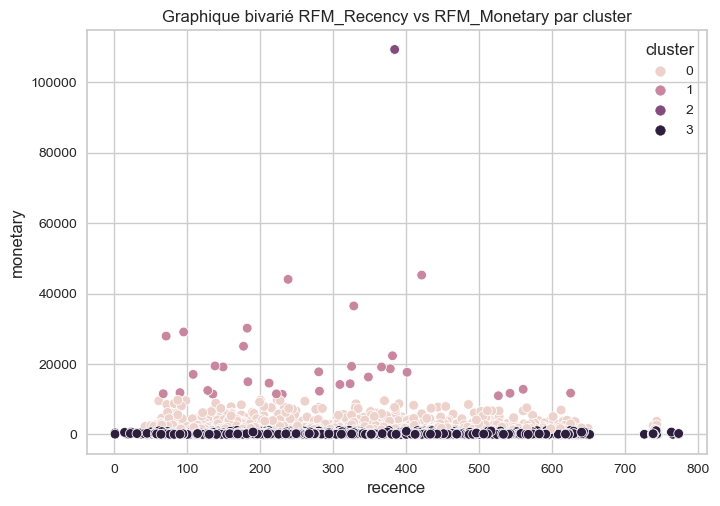

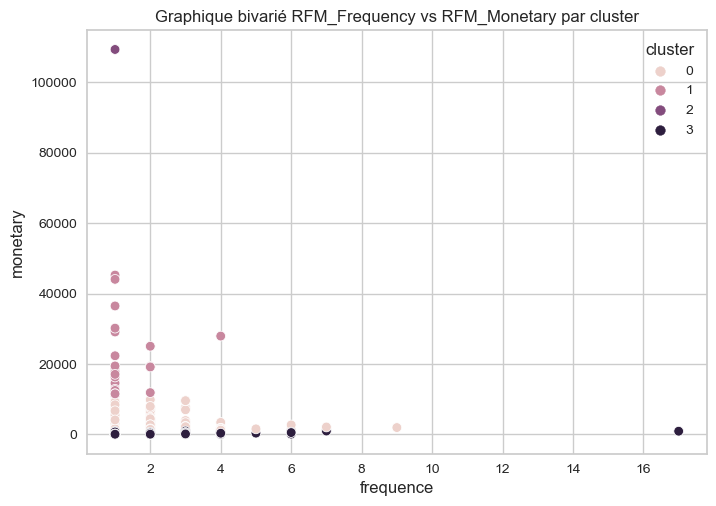

In [73]:
import matplotlib.pyplot as plt


# Graphique bivarié entre RFM_Recency et RFM_Frequency
sns.scatterplot(x='recence', y='frequence', hue='cluster', data=rfm_df)
plt.title('Graphique bivarié RFM_Recency vs RFM_Frequency par cluster')
plt.show()

# Graphique bivarié entre RFM_Recency et RFM_Monetary
sns.scatterplot(x='recence', y='monetary', hue='cluster', data=rfm_df)
plt.title('Graphique bivarié RFM_Recency vs RFM_Monetary par cluster')
plt.show()

# Graphique bivarié entre RFM_Frequency et RFM_Monetary
sns.scatterplot(x='frequence', y='monetary', hue='cluster', data=rfm_df)
plt.title('Graphique bivarié RFM_Frequency vs RFM_Monetary par cluster')
plt.show()

##### K-Means RFM avec  feature "review_score"

In [74]:
# Ajouter une colonne 'review_score' 
rfm_df = rfm_df.assign(review_score=np.random.randint(1, 6, size=len(rfm_df)))

# Afficher le résultat
rfm_df

,recence,frequence,monetary,cluster,review_score
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,3,3
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,3,4
0000f46a3911fa3c0805444483337064,586,1,86.22,3,2
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,3,4
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,3,5
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,4134.84,0,4
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,3,1
ffff371b4d645b6ecea244b27531430a,618,1,112.46,3,1


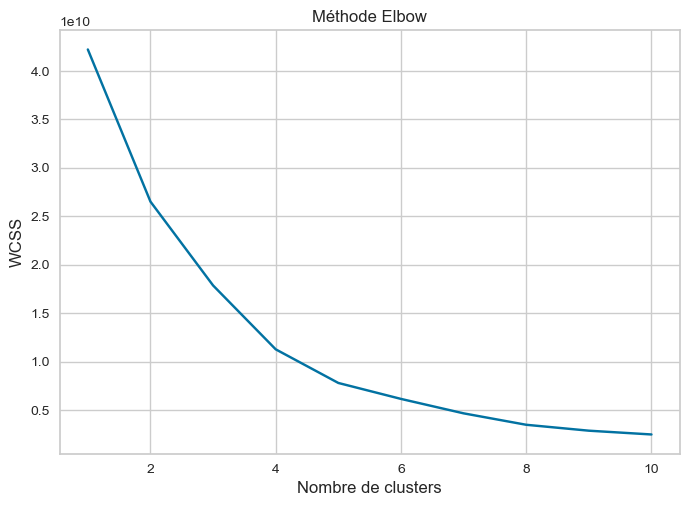

In [75]:
# Sélectionner les features 
X = rfm_df[['recence', 'frequence', 'monetary', "review_score"]]

# le nombre optimal de clusters en utilisant la méthode "Elbow"
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
# Appliquer K-means avec le nombre optimal de clusters trouvé
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

In [77]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## CLUSTERING PAR DBSCAN

In [78]:
X = rfm_df.loc[:, ['recence', 'frequence', 'monetary']].values
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X)

DBSCAN(min_samples=10)

In [79]:
labels = dbscan.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [80]:
# compter le nombre de clusters et le nombre de points de données considérés comme du bruit
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print('Nombre de clusters : {}'.format(n_clusters))
print('Nombre de points de données considérés comme du bruit : {}'.format(n_noise))

Nombre de clusters : 27
Nombre de points de données considérés comme du bruit : 95672


/var/folders/60/hb75r86s6q32cwlq2m29fbkm0000gn/T/ipykernel_892/1565579402.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_cluster[:, 0], X_cluster[:, 1], s=50, c=color)


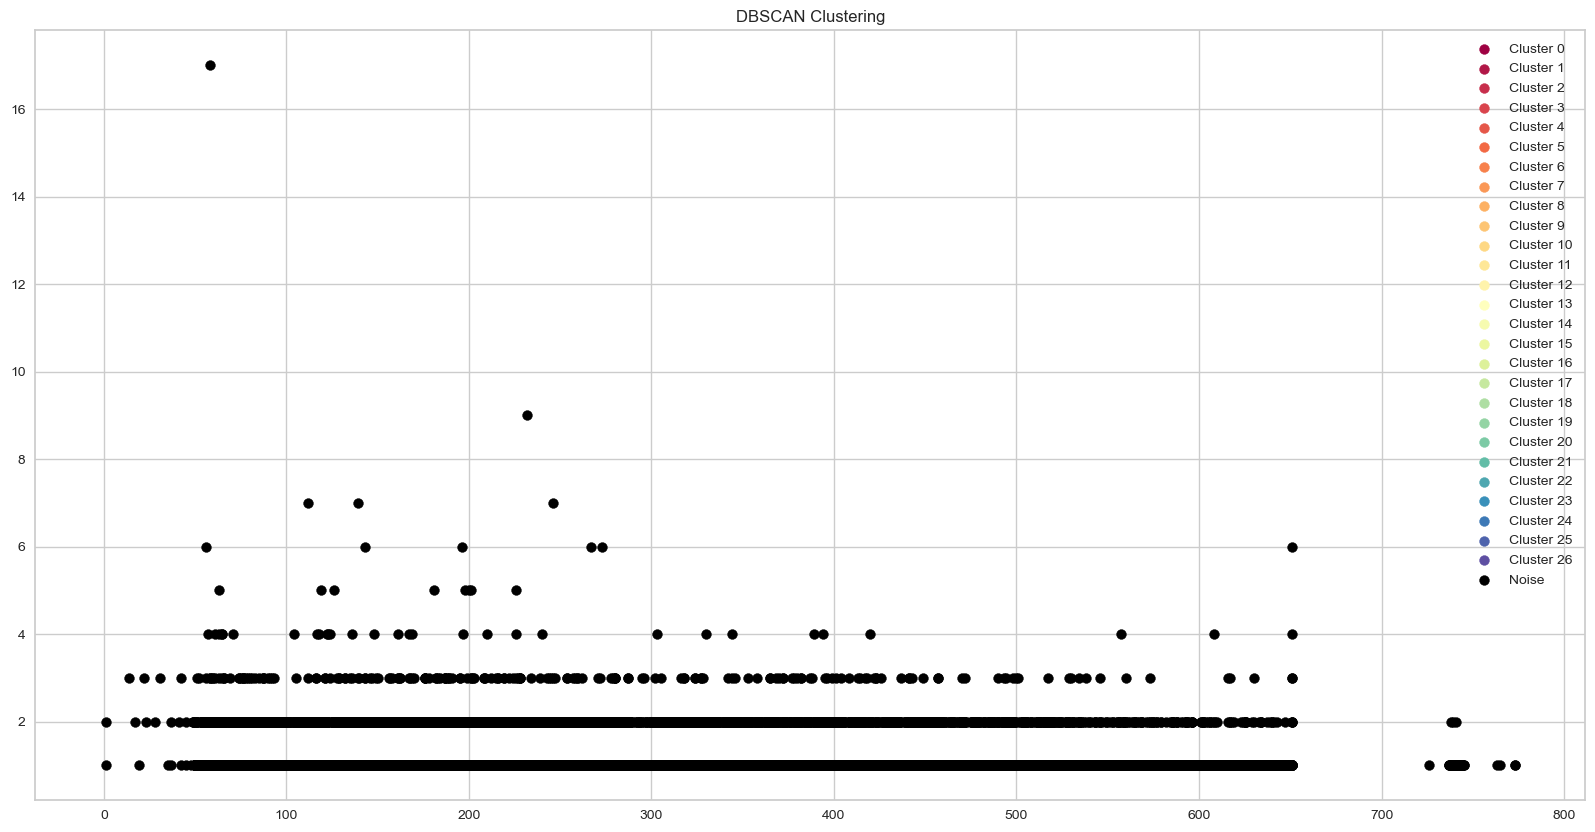

In [82]:
# créer une palette de couleurs pour les clusters
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

# créer une figure pour afficher la visualisation
plt.figure(figsize=(20, 10))

# dessiner les points de données en utilisant une couleur différente pour chaque cluster
for cluster_id, color in zip(range(n_clusters), colors):
    # récupérer les points de données qui appartiennent à ce cluster
    X_cluster = X[labels == cluster_id]
    
    # dessiner les points de données avec cette couleur
    plt.scatter(X_cluster[:, 0], X_cluster[:, 1], s=50, c=color)

# dessiner les points de données considérés comme du bruit en noir
X_noise = X[labels == -1]
plt.scatter(X_noise[:, 0], X_noise[:, 1], s=50, c='black')

# légende et un titre
plt.title('DBSCAN Clustering')
plt.legend(['Cluster {}'.format(i) for i in range(n_clusters)] + ['Noise'])

# afficher la figure
plt.show()

## Conclusion

En conclusion, nous avons divisé notre ensemble de données clients en utilisant différents algorithmes, notamment K-Means et DBSCAN. Après avoir analysé les résultats obtenus avec les deux algorithmes, en utilisant la mesure de qualité de silhouette, nous avons conclu que le modèle K-Means est celui qui offre les meilleures performances.